In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.17.0


In [50]:
gen = pd.read_csv("C:\\Users\\HP\\Desktop\\DATA SCIENCE\\DataSolarPowerGeneration\\Plant_2_Generation_Data.csv")
gen

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07
...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,4136001,q49J1IKaHRwDQnt,0.0,0.0,4157.000000,5.207580e+05
67694,2020-06-17 23:45:00,4136001,rrq4fwE8jgrTyWY,0.0,0.0,3931.000000,1.211314e+08
67695,2020-06-17 23:45:00,4136001,vOuJvMaM2sgwLmb,0.0,0.0,4322.000000,2.427691e+06
67696,2020-06-17 23:45:00,4136001,xMbIugepa2P7lBB,0.0,0.0,4218.000000,1.068964e+08


In [51]:
weather = pd.read_csv("C:\\Users\\HP\\Desktop\\DATA SCIENCE\\DataSolarPowerGeneration\\Plant_1_Weather_Sensor_Data.csv")
weather

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0
...,...,...,...,...,...,...
3177,2020-06-17 22:45:00,4135001,HmiyD2TTLFNqkNe,22.150570,21.480377,0.0
3178,2020-06-17 23:00:00,4135001,HmiyD2TTLFNqkNe,22.129816,21.389024,0.0
3179,2020-06-17 23:15:00,4135001,HmiyD2TTLFNqkNe,22.008275,20.709211,0.0
3180,2020-06-17 23:30:00,4135001,HmiyD2TTLFNqkNe,21.969495,20.734963,0.0


In [52]:
gen['DATE_TIME'] = pd.to_datetime(gen['DATE_TIME'])
weather['DATE_TIME'] = pd.to_datetime(weather['DATE_TIME'])

In [53]:
# Round generation timestamps to 15-minute intervals (to match weather)
gen['DATE_TIME'] = gen['DATE_TIME'].dt.round('15min')

In [54]:
# the reason I am having this merging is empty is because the time of record of bother dataset 
# are not the same the time of recording of the weather dataset is 15min, while that of the gen dataset
# is like every 5min

# so I have to round up the gen dataset to 15mins too so that they can align
merged_data = pd.merge(gen, weather, on = ['DATE_TIME'], how = 'inner')
merged_data.head(7)

,DATE_TIME,PLANT_ID_x,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,PLANT_ID_y,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
2,2020-05-15,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
3,2020-05-15,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
4,2020-05-15,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
5,2020-05-15,4136001,LYwnQax7tkwH5Cb,0.0,0.0,1872.500000,1.794959e+09,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
6,2020-05-15,4136001,LlT2YUhhzqhg5Sw,0.0,0.0,1094.357143,2.825928e+08,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0


In [55]:
# I then seperate the hour, minutes, day and month into diff columns

merged_data['HOUR'] = merged_data['DATE_TIME'].dt.hour
merged_data['MINUTE'] = merged_data['DATE_TIME'].dt.minute
merged_data['DAY'] = merged_data['DATE_TIME'].dt.day
merged_data['MONTH'] = merged_data['DATE_TIME'].dt.month

In [56]:
# I ONLY CHOSE THE MONTH AND hour because in the morning the sun heat is diff from 
# that of the morning and of course, the diff seasons in diff months affects the sun rays.

merged_data['new_hour_sin'] = np.sin(2 * np.pi * merged_data['HOUR'] / 24)
merged_data['new_hour_cos'] = np.cos(2 * np.pi * merged_data['HOUR'] / 24)

# Cyclical encoding for month of year
merged_data['new_month_sin'] = np.sin(2 * np.pi * merged_data['MONTH'] / 12)
merged_data['new_month_cos'] = np.cos(2 * np.pi * merged_data['MONTH'] / 12)

In [57]:
merged_data.head(10)

,DATE_TIME,PLANT_ID_x,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,PLANT_ID_y,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,HOUR,MINUTE,DAY,MONTH,new_hour_sin,new_hour_cos,new_month_sin,new_month_cos
0,2020-05-15,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,0,0,15,5,0.0,1.0,0.5,-0.866025
1,2020-05-15,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,0,0,15,5,0.0,1.0,0.5,-0.866025
2,2020-05-15,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,0,0,15,5,0.0,1.0,0.5,-0.866025
3,2020-05-15,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,0,0,15,5,0.0,1.0,0.5,-0.866025
4,2020-05-15,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,0,0,15,5,0.0,1.0,0.5,-0.866025
5,2020-05-15,4136001,LYwnQax7tkwH5Cb,0.0,0.0,1872.500000,1.794959e+09,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,0,0,15,5,0.0,1.0,0.5,-0.866025
6,2020-05-15,4136001,LlT2YUhhzqhg5Sw,0.0,0.0,1094.357143,2.825928e+08,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,0,0,15,5,0.0,1.0,0.5,-0.866025
7,2020-05-15,4136001,Mx2yZCDsyf6DPfv,0.0,0.0,5692.200000,2.453646e+06,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,0,0,15,5,0.0,1.0,0.5,-0.866025
8,2020-05-15,4136001,NgDl19wMapZy17u,0.0,0.0,1866.200000,1.115126e+08,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,0,0,15,5,0.0,1.0,0.5,-0.866025
9,2020-05-15,4136001,PeE6FRyGXUgsRhN,0.0,0.0,651.200000,1.348351e+09,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,0,0,15,5,0.0,1.0,0.5,-0.866025


In [58]:
merged_data

,DATE_TIME,PLANT_ID_x,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,PLANT_ID_y,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,HOUR,MINUTE,DAY,MONTH,new_hour_sin,new_hour_cos,new_month_sin,new_month_cos
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,0,0,15,5,0.000000,1.000000,5.000000e-01,-0.866025
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,0,0,15,5,0.000000,1.000000,5.000000e-01,-0.866025
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,0,0,15,5,0.000000,1.000000,5.000000e-01,-0.866025
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,0,0,15,5,0.000000,1.000000,5.000000e-01,-0.866025
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,0,0,15,5,0.000000,1.000000,5.000000e-01,-0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66167,2020-06-17 23:45:00,4136001,q49J1IKaHRwDQnt,0.0,0.0,4157.000000,5.207580e+05,4135001,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0,23,45,17,6,-0.258819,0.965926,1.224647e-16,-1.000000
66168,2020-06-17 23:45:00,4136001,rrq4fwE8jgrTyWY,0.0,0.0,3931.000000,1.211314e+08,4135001,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0,23,45,17,6,-0.258819,0.965926,1.224647e-16,-1.000000
66169,2020-06-17 23:45:00,4136001,vOuJvMaM2sgwLmb,0.0,0.0,4322.000000,2.427691e+06,4135001,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0,23,45,17,6,-0.258819,0.965926,1.224647e-16,-1.000000
66170,2020-06-17 23:45:00,4136001,xMbIugepa2P7lBB,0.0,0.0,4218.000000,1.068964e+08,4135001,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0,23,45,17,6,-0.258819,0.965926,1.224647e-16,-1.000000


In [59]:
merged_data = merged_data.drop(
    columns=['DC_POWER','SOURCE_KEY_x', 'DATE_TIME', 'PLANT_ID_x', 'DAILY_YIELD',
            'TOTAL_YIELD','PLANT_ID_y','SOURCE_KEY_y',
            'HOUR','MINUTE','DAY','MONTH'])
merged_data.head(5)

,AC_POWER,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,new_hour_sin,new_hour_cos,new_month_sin,new_month_cos
0,0.0,25.184316,22.857507,0.0,0.0,1.0,0.5,-0.866025
1,0.0,25.184316,22.857507,0.0,0.0,1.0,0.5,-0.866025
2,0.0,25.184316,22.857507,0.0,0.0,1.0,0.5,-0.866025
3,0.0,25.184316,22.857507,0.0,0.0,1.0,0.5,-0.866025
4,0.0,25.184316,22.857507,0.0,0.0,1.0,0.5,-0.866025


In [60]:
x = merged_data.drop(columns=['AC_POWER'])
y = merged_data['AC_POWER']

In [61]:
# Complete Solar Power Model Training Code
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Step 1: Handle NaN values (replace with your actual x, y variables)
print("Handling missing values...")
y_filled = y.fillna(0.0)
x_filled = x.fillna(0.0)

print(f"Data after filling NaN:")
print(f"y NaN count: {y_filled.isnull().sum()}")
print(f"x NaN count: {x_filled.isnull().sum().sum()}")

# Compile with lower learning rate
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

print("Model summary:")
model.summary()



Handling missing values...
Data after filling NaN:
y NaN count: 0
x NaN count: 0
Model summary:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,737 (18.50 KB)

 Trainable params: 4,737 (18.50 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
# Step 2: Create train/val/test splits with stratification
print("\nCreating train/val/test splits...")
try:
    # Create power level bins for stratification
    power_bins = pd.cut(y_filled, bins=[0, 0.1, 100, 500, 1000, 1500], labels=[0,1,2,3,4])
    power_bins = power_bins.fillna(0)  # Handle any edge cases
    
    # First split: 80% train, 20% temp
    x_train, x_temp, y_train, y_temp = train_test_split(
        x_filled, y_filled, test_size=0.2, stratify=power_bins, random_state=42
    )
    
    # Second split: 10% val, 10% test
    temp_bins = pd.cut(y_temp, bins=[0, 0.1, 100, 500, 1000, 1500], labels=[0,1,2,3,4])
    temp_bins = temp_bins.fillna(0)
    
    x_val, x_test, y_val, y_test = train_test_split(
        x_temp, y_temp, test_size=0.5, stratify=temp_bins, random_state=42
    )
    
except Exception as e:
    print(f"Stratified split failed: {e}")
    print("Using simple random split...")
    # Fallback to simple split
    x_train, x_temp, y_train, y_temp = train_test_split(
        x_filled, y_filled, test_size=0.2, random_state=42
    )
    x_val, x_test, y_val, y_test = train_test_split(
        x_temp, y_temp, test_size=0.5, random_state=42
    )

print("Data splits:")
print(f"Train: {x_train.shape}, {y_train.shape}")
print(f"Val:   {x_val.shape}, {y_val.shape}")  
print(f"Test:  {x_test.shape}, {y_test.shape}")



Creating train/val/test splits...
Data splits:
Train: (52937, 7), (52937,)
Val:   (6617, 7), (6617,)
Test:  (6618, 7), (6618,)


In [63]:
# Step 3: Check distributions are balanced
print(f"\nTarget distributions:")
print(f"Train - mean: {y_train.mean():.2f}, std: {y_train.std():.2f}")
print(f"Val   - mean: {y_val.mean():.2f}, std: {y_val.std():.2f}")
print(f"Test  - mean: {y_test.mean():.2f}, std: {y_test.std():.2f}")


Target distributions:
Train - mean: 242.88, std: 362.60
Val   - mean: 242.81, std: 363.03
Test  - mean: 244.07, std: 362.07


In [64]:
# Step 4: Apply log transformation to handle skewed data
print("\nApplying log transformation...")
y_train_log = np.log1p(y_train)  # log(1 + x)
y_val_log = np.log1p(y_val)



Applying log transformation...


In [65]:
# Step 5: Build improved model
print("\nBuilding model...")
model = Sequential([
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'), 
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1)  # No activation - you already removed ReLU
])

# Compile with lower learning rate
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

print("Model summary:")
model.summary()


Building model...
Model summary:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [66]:
# Step 6: Train the model
print("\nTraining model...")
history = model.fit(
    x_train, y_train_log, 
    validation_data=(x_val, y_val_log),
    epochs=100,
    batch_size=32,
    verbose=1,
    # Add early stopping to prevent overfitting
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss', 
            patience=10, 
            restore_best_weights=True
        )
    ]
)


Training model...
Epoch 1/100
1655/1655 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 6.2067 - mae: 1.8073 - val_loss: 3.8249 - val_mae: 1.3939
Epoch 2/100
1655/1655 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 2.6999 - mae: 0.9725 - val_loss: 2.8262 - val_mae: 1.1588
Epoch 3/100
1655/1655 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 2.5075 - mae: 0.9098 - val_loss: 3.0200 - val_mae: 1.2295
Epoch 4/100
1655/1655 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 2.4417 - mae: 0.8825 - val_loss: 2.2397 - val_mae: 0.8611
Epoch 5/100
1655/1655 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 2.2860 - mae: 0.8062 - val_loss: 2.2736 - val_mae: 0.8405
Epoch 6/100
1655/1655 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 2.2881 - mae: 0.8016 - val_loss: 2.1638 - val_mae: 0.7342
Epoch 7/100
1655/1655 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 2.2332 - mae: 0.7767 - val_loss: 2.1675 - val_mae: 0.7402
Epoch 8/100
1655/1655 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 2.2547 - mae: 0.7807 - val_loss: 2.1615 - val_mae: 0.7260
Epoch 9/100

In [67]:
# Step 7: Make predictions and transform back
print("\nMaking predictions...")
predictions_log = model.predict(x_val)
predictions = np.expm1(predictions_log)  # Transform back: exp(x) - 1


Making predictions...
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [68]:
# Step 8: Evaluate results
print("\nSample predictions vs actual:")
for i in range(10):
    pred_val = predictions[i][0] if predictions.ndim > 1 else predictions[i]
    actual_val = y_val.iloc[i] if hasattr(y_val, 'iloc') else y_val[i]
    print(f"Predicted: {pred_val:.2f}, Actual: {actual_val:.2f}")


Sample predictions vs actual:
Predicted: 130.57, Actual: 980.36
Predicted: 342.95, Actual: 193.14
Predicted: 228.21, Actual: 366.29
Predicted: 125.28, Actual: 953.47
Predicted: 273.50, Actual: 42.45
Predicted: -0.01, Actual: 0.00
Predicted: -0.02, Actual: 0.00
Predicted: 138.93, Actual: 118.05
Predicted: -0.01, Actual: 0.00
Predicted: -0.02, Actual: 0.00


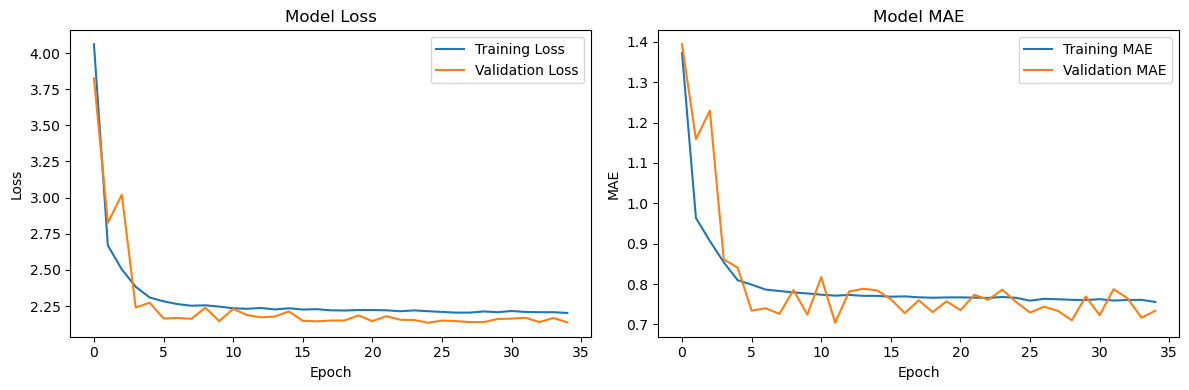

In [69]:
# Step 9: Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()


In [70]:
# Step 10: Calculate final metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_val, predictions)
rmse = np.sqrt(mean_squared_error(y_val, predictions))
r2 = r2_score(y_val, predictions)

print(f"\nFinal metrics:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}") 
print(f"R²: {r2:.3f}")

print(f"\nPrediction ranges:")
print(f"Predicted: {predictions.min():.2f} to {predictions.max():.2f}")
print(f"Actual: {y_val.min():.2f} to {y_val.max():.2f}")


Final metrics:
MAE: 171.48
RMSE: 336.58
R²: 0.140

Prediction ranges:
Predicted: -0.02 to 342.95
Actual: 0.00 to 1378.77


In [71]:
model.save('solar_model.h5')
print("Model saved successfully!")

Model saved successfully!


# SIT DOWN AND CHECK OUT WHY YOU WERE HAVING ISSUES INITIALLY!!
# IMBALANCED DATA(CHECK THE DATA STATSTICES LIKE YOU'D DO FOR LINEAR DATA)
# SKEWED DATA, ETC ...